# ***Processing with RN data in stem woody biomass for forest sites***

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
site_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in _wood/Unit_site_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,Sr_2021_kBq_m,ln_Sr_2021_kBq_m,T_ag_Cs,T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,728,59,Pine,0,27,100.000000,13.689683,14.172733,39.767869,2700,...,142.473352,4.959155,4.086871,32.707871,22,0.635455,0.625,0.026411,7.371249,83
1,732,60,Pine,0,34,100.000000,13.427365,16.722719,48.177280,3400,...,140.891592,4.947991,5.217198,44.005465,27,0.633333,0.640,0.033333,7.376963,84
2,561,18,Pine,0,31,100.000000,36.101112,22.899803,31.736072,310,...,127.861465,4.850947,1.376541,11.262189,26,0.667308,0.700,0.097134,11.738311,56
3,583,24,Pine,0,41,100.000000,22.675871,19.058137,33.092769,820,...,132.062791,4.883277,1.012129,14.614260,32,0.650625,0.645,0.052556,11.738726,56
4,607,30,Pine,0,29,97.488699,11.569878,7.286778,3.049340,290,...,256.528882,5.547241,1.320400,22.726486,37,0.977838,0.980,0.100193,9.296014,49


In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'ln_Cs_2021_kBq_m', 'ln_Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 'T_ag_Cs', 'T_ag_Sr'])
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0" is nutural stand, "1" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,D_live_cm,...,M_Soil,AEDR_mean,Distance_km,Azimuth,ln_Cs_2021_kBq_m,ln_Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,T_ag_Cs,T_ag_Sr
0,Pine,0,100.000000,13.689683,14.172733,39.767869,a,1,60,13.689683,...,1,0.635455,7.371249,83,6.288433,4.959155,7.696213,8.446771,4.086871,32.707871
1,Pine,0,100.000000,13.427365,16.722719,48.177280,a,1,60,13.427365,...,2,0.633333,7.376963,84,6.285414,4.947991,7.937375,8.732305,5.217198,44.005465
2,Pine,0,100.000000,36.101112,22.899803,31.736072,n,0,105,36.101112,...,2,0.667308,11.738311,56,6.324216,4.850947,6.643790,7.272398,1.376541,11.262189
3,Pine,0,100.000000,22.675871,19.058137,33.092769,a,1,65,22.675871,...,2,0.650625,11.738726,56,6.315880,4.883277,6.327937,7.565275,1.012129,14.614260
4,Pine,0,97.488699,11.569878,7.286778,3.049340,n,0,50,11.520995,...,0,0.977838,9.296014,49,6.678611,5.547241,6.956545,8.670772,1.320400,22.726486


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Species           209 non-null    object 
 1   Species_ID        209 non-null    int64  
 2   % composition     209 non-null    float64
 3   D_cm              209 non-null    float64
 4   H_m               209 non-null    float64
 5   G_m2_ha           209 non-null    float64
 6   Origin            209 non-null    object 
 7   Origin_ID         209 non-null    int64  
 8   A_year            209 non-null    int64  
 9   D_live_cm         209 non-null    float64
 10  H_live_m          209 non-null    float64
 11  G_live_m2_ha      209 non-null    float64
 12  F_Soil_ID         209 non-null    int64  
 13  M_Soil            209 non-null    int64  
 14  AEDR_mean         209 non-null    float64
 15  Distance_km       209 non-null    float64
 16  Azimuth           209 non-null    int64  
 1

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species","Origin"])['ln_A_Cs', 'ln_A_Sr'].describe()

<ipython-input-5-cb3922d68dae>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Species","Origin"])['ln_A_Cs', 'ln_A_Sr'].describe()


ln_A_Cs                                                    \
                 count      mean       std       min       25%       50%   
Species Origin                                                             
Alder   n         13.0  6.249674  1.661129  3.295837  5.840642  6.040255   
Aspen   n          9.0  5.584313  3.039601  2.708050  3.295837  4.204693   
Birch   a          8.0  4.362177  2.328619  2.564949  2.827543  3.233849   
        n         37.0  6.034944  2.148756  2.079442  4.488636  6.363028   
Oak     a          4.0  8.028237  2.843374  3.891820  7.345698  9.021902   
        n          3.0  5.397258  2.735149  2.397895  4.219075  6.040255   
Pine    a         79.0  6.394467  1.794226  1.526056  5.172417  6.811244   
        n         51.0  5.557900  2.118875  1.504077  3.783156  5.659482   
Red oak a          3.0  3.445685  0.588708  2.833213  3.164860  3.496508   
Robinia n          1.0  4.394449       NaN  4.394449  4.394449  4.394449   
Spruce  a          1.0  5.176150       NaN  5.176150  5.176150  5.176150   

                                    ln_A_Sr                                \
                     75%        max   count      mean       std       min   
Species Origin                                                              
Alder   n       6.940222   9.287301    13.0  6.055811  1.449620  4.094345   
Aspen   n       6.729824  11.366743     9.0  7.575485  2.597130  4.615121   
Birch   a       5.514399   9.296518     8.0  6.723859  2.848366  3.401197   
        n       7.306531  10.332018    37.0  7.876554  2.178501  2.660260   
Oak     a       9.704441  10.177324     4.0  8.028961  3.011778  3.931826   
        n       6.896939   7.753624     3.0  6.067628  1.994720  3.871201   
Pine    a       7.413919  10.468801    79.0  7.586615  1.908352  2.406945   
        n       6.951761  10.328755    51.0  7.291517  1.863717  4.317488   
Red oak a       3.751920   4.007333     3.0  4.697638  0.334751  4.418841   
Robinia n       4.394449   4.394449     1.0  7.265430       NaN  7.265430   
Spruce  a       5.176150   5.176150     1.0  7.783224       NaN  7.783224   

                                                         
                     25%       50%       75%        max  
Species Origin                                           
Alder   n       4.442651  6.302619  7.286192   7.649693  
Aspen   n       5.209486  7.870930  8.881836  11.180246  
Birch   a       5.087325  5.586554  8.559757  11.957611  
        n       6.873164  7.824046  8.995909  13.864301  
Oak     a       7.072729  8.529114  9.485347  11.125791  
        n       5.218233  6.565265  7.165841   7.766417  
Pine    a       6.293930  8.022897  8.896975  11.378251  
        n       6.107615  6.917706  8.327879  12.687263  
Red oak a       4.512005  4.605170  4.837037   5.068904  
Robinia n       7.265430  7.265430  7.265430   7.265430  
Spruce  a       7.783224  7.783224  7.783224   7.783224

In [6]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = ["ln_A_Cs"], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  13.689683  14.172733  39.767869   
1      Pine           0     100.000000  13.427365  16.722719  48.177280   
2      Pine           0     100.000000  36.101112  22.899803  31.736072   
3      Pine           0     100.000000  22.675871  19.058137  33.092769   
4      Pine           0      97.488699  11.569878   7.286778   3.049340   
..      ...         ...            ...        ...        ...        ...   
204    Pine           0     100.000000  35.040189  30.408979  52.037681   
205   Aspen           4     100.000000   7.826238  10.127355  26.931363   
206   Alder           3     100.000000  28.978440  26.563984  36.908750   
207    Pine           0     100.000000   9.173331   8.917017  26.454278   
208   Birch           2      99.642147   7.546824  12.122158  19.695312   

    Origin  Origin_ID  A_year  D_live_cm  ...  M_Soil  AEDR_mean  Distance_km  \
0        a        

In [7]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,D_live_cm,H_live_m,G_live_m2_ha,...,M_Soil,AEDR_mean,Distance_km,Azimuth,ln_Cs_2021_kBq_m,ln_Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,T_ag_Cs,T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,...,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.076555,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,17.555614,16.999369,31.436810,...,2.220096,2.526858,14.640059,174.296651,6.604313,5.063896,5.964225,7.381811,0.981351,14.880664
std,1.579276,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,8.470174,6.783414,15.470759,...,0.692944,4.756383,12.363729,99.912885,1.489537,1.836778,2.095016,2.042856,1.011648,13.738437
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.874874,2.704460,0.656684,...,0.000000,0.110000,3.998568,9.000000,3.360908,0.876328,1.504077,2.406945,0.009303,0.800387
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,12.307179,12.193980,20.938452,...,2.000000,0.460000,6.562497,56.000000,6.102349,3.784361,4.110874,5.752573,0.248868,5.667873
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,16.780740,17.365162,31.800484,...,2.000000,0.756000,9.203749,189.000000,6.563573,5.233597,6.309918,7.506592,0.603680,11.248801
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,22.023624,21.604236,43.193896,...,3.000000,2.401667,20.865459,261.000000,7.570955,6.092493,7.306531,8.846497,1.402308,19.433892
max,6.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,41.664506,33.436497,71.679126,...,4.000000,36.591739,57.286577,342.000000,10.133543,9.256979,11.366743,13.864301,5.217198,105.506332


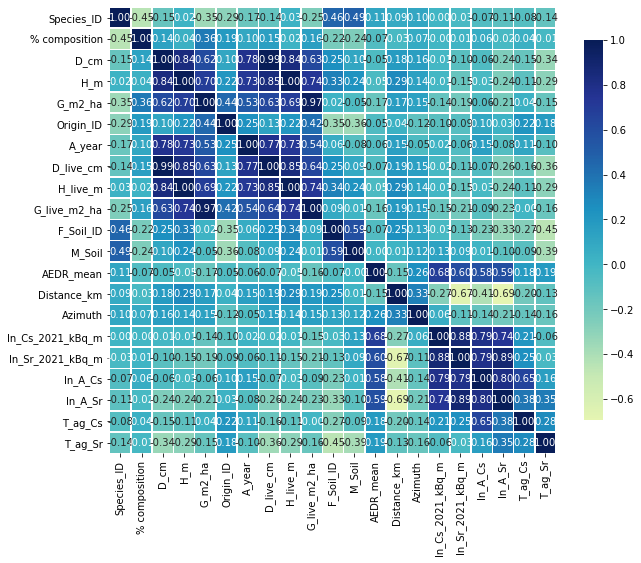

In [8]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID', 'D_cm', 'H_m', 'G_m2_ha',
                                    'A_year', 'F_Soil_ID', 'AEDR_mean'])
y = pd.DataFrame(select, columns= ['ln_A_Cs'])

In [10]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_value = np.random.normal(10, 2, size=count)
    X['Random_col'] = norm_value
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [11]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,F_Soil_ID,AEDR_mean
0,0,13.689683,14.172733,39.767869,60,1,0.635455
1,0,13.427365,16.722719,48.177280,60,1,0.633333
2,0,36.101112,22.899803,31.736072,105,1,0.667308
3,0,22.675871,19.058137,33.092769,65,1,0.650625
4,0,11.569878,7.286778,3.049340,50,1,0.977838


In [12]:
# Columns in "y" data collections
y.head()

,ln_A_Cs
0,7.696213
1,7.937375
2,6.643790
3,6.327937
4,6.956545


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.6506553455545102, 0.7854412357546825, 0.7298949128004701]
    Mean: 0.722
    Std: 0.055

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.21506788 1.03084389 1.03713279]
    Mean: 1.094
    Std: 0.085

 --------------------
Mean absolute error (MAE): 

    Scores: [0.9809119221801276, 0.8569376996342004, 0.6842071857644525]
    Mean: 0.841
    Std: 0.122

 --------------------


# Find optimal hyperparameters for XGBoost model

In [17]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [18]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y, eval_metric="rmse")

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.508 (std: 0.223)
Parameters: {'colsample_bytree': 0.814824449160006, 'gamma': 0.3529667421064807, 'learning_rate': 0.10220879083358876, 'max_depth': 2, 'n_estimators': 80, 'subsample': 0.31641269579750747}



In [19]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([1.0039382 , 0.77140141, 0.89989314, ..., 0.48713217, 0.53798175,
       0.66389751]), 'std_fit_time': array([0.30513643, 0.1371799 , 0.31527582, ..., 0.00078948, 0.00127819,
       0.01988875]), 'mean_score_time': array([0.0162272 , 0.0123805 , 0.0161396 , ..., 0.01132903, 0.01139846,
       0.01145   ]), 'std_score_time': array([7.03065079e-03, 5.74803245e-04, 5.30121390e-03, ...,
       2.54849722e-05, 6.35886263e-05, 8.33793643e-05]), 'param_colsample_bytree': masked_array(data=[0.630160886025253, 0.5790722999094733,
                   0.35199400708232864, ..., 0.6561782998416414,
                   0.8270166678693456, 0.14789224421388295],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.18064462145310145, 0.1550993496062556,
                   0.4940799388771408, ..., 0.39487978347051184,
                   0.22333632335240383, 0.46080667005216536],
    

In [20]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.814824449160006
Gamma: 0.3529667421064807
Learning_rate: 0.10220879083358876
Max_depth: 2
N_estimators: 80
Subsample: 0.31641269579750747


# Creating a basic XGBoost model

In [75]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [84]:
# Generate test and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [85]:
# Implementation of the scikit-learn API for XGBoost regression
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5+50, subsample=p6, eval_metric=["rmse"])

In [86]:
# Show all parameters of XGBoost model
print(xgb_model)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.814824449160006,
             enable_categorical=False, eval_metric=['rmse'],
             gamma=0.3529667421064807, gpu_id=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.10220879083358876,
             max_delta_step=None, max_depth=2, min_child_weight=None,
             missing=nan, monotone_constraints=None, n_estimators=130,
             n_jobs=None, num_parallel_tree=None, predictor=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=0.31641269579750747,
             tree_method=None, validate_parameters=None, verbosity=None)


In [87]:
# Fitting the model 
xgb_model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_train, y_train), (X_test, y_test)])
# learning dynamics
y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)

[0]	validation_0-rmse:5.29511	validation_1-rmse:5.44896
[1]	validation_0-rmse:4.82210	validation_1-rmse:4.96744
[2]	validation_0-rmse:4.42048	validation_1-rmse:4.57946
[3]	validation_0-rmse:4.00221	validation_1-rmse:4.14900
[4]	validation_0-rmse:3.67192	validation_1-rmse:3.81821
[5]	validation_0-rmse:3.38035	validation_1-rmse:3.52294
[6]	validation_0-rmse:3.07857	validation_1-rmse:3.21524
[7]	validation_0-rmse:2.83488	validation_1-rmse:2.98081
[8]	validation_0-rmse:2.64605	validation_1-rmse:2.79970
[9]	validation_0-rmse:2.45220	validation_1-rmse:2.64531
[10]	validation_0-rmse:2.29491	validation_1-rmse:2.49404
[11]	validation_0-rmse:2.12152	validation_1-rmse:2.33068
[12]	validation_0-rmse:1.97182	validation_1-rmse:2.18690
[13]	validation_0-rmse:1.84136	validation_1-rmse:2.05227
[14]	validation_0-rmse:1.72531	validation_1-rmse:1.93644
[15]	validation_0-rmse:1.62577	validation_1-rmse:1.83184
[16]	validation_0-rmse:1.53607	validation_1-rmse:1.73622
[17]	validation_0-rmse:1.45885	validation

In [88]:
# Iteration with the best result
optimal_n= xgb_model.best_ntree_limit-1
print("The best iteration: " + str(optimal_n))    

The best iteration: 129


In [89]:
# Preparing data for building a learning graph
results = xgb_model.evals_result()

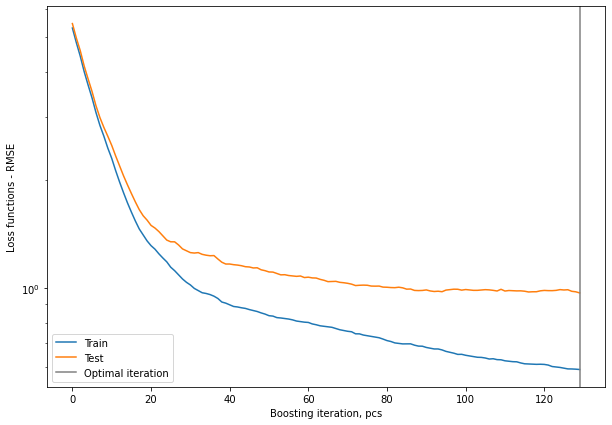

In [90]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(results['validation_0']['rmse'], label='Train')
plt.plot(results['validation_1']['rmse'], label='Test')
plt.axvline(optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a basic XGBoost model

# Test (validation) observations

In [91]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred) # Double transformation
y_pred2 = conv_y_pred.values
y_test2 = y_test.values

# Intermediate results
n_sample = len(y_pred2)
main_sample = y_test.sum() / n_sample

# Calculation of bias
diff = y_pred2 - y_test2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_test, y_pred)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: -0.2
Relative bias(%):  -1.85
RMSE: 1.0
Relative RMSE(%):  0.160
MSE: 0.9
R square: 78.8%


In [92]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [93]:
# Convert input data
x_test_conv = np.array(y_test)
x_test_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_test_convert[i] = np.float(x_test_conv[i])

x_plot = x_test_convert
y_plot = y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.312
a1: 0.754
R^2: 0.798
Uncertainty
a0: 1.31+/-0.31
a1: 0.75+/-0.05


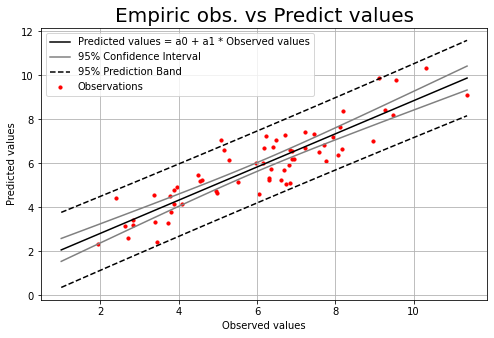

In [94]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# All observations

/home/dima/anaconda3/lib/python3.8/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


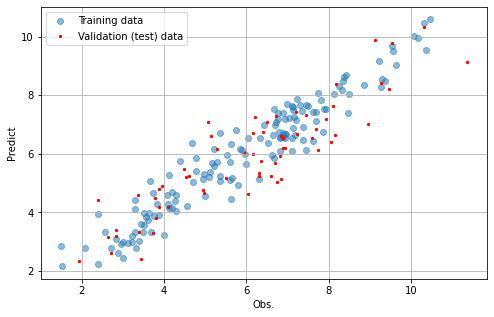

In [95]:
# Comparison of training and testing prediction values for XGBoost model 
y_pred_train = xgb_model.predict(X_train, ntree_limit=xgb_model.best_ntree_limit)

plt.figure(figsize =(8, 5))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training data')
plt.scatter(y_test, y_pred, s = 5, c = "red", label='Validation (test) data')
plt.xlabel('Obs.')
plt.ylabel('Predict')
plt.grid(True)
plt.legend(loc='best')

# Training sample

In [96]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred_train) # Double transformation
y_pred_train2 = conv_y_pred.values
y_train2 = y_train.values

# Intermediate results
n_sample = len(y_pred_train2)
main_sample = y_train.sum() / n_sample

# Calculation of bias
diff = y_pred_train2 - y_train2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_train, y_pred_train)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_train, y_pred_train)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: 0.0
Relative bias(%):  1.07
RMSE: 0.6
Relative RMSE(%):  0.100
MSE: 0.4
R square: 91.9%


In [97]:
# Convert input data
x_train_conv = np.array(y_train)
x_train_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_train_convert[i] = np.float(x_train_conv[i])

x_plot = x_train_convert
y_plot = y_pred_train
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.688
a1: 0.891
R^2: 0.921
Uncertainty
a0: 0.69+/-0.14
a1: 0.891+/-0.022


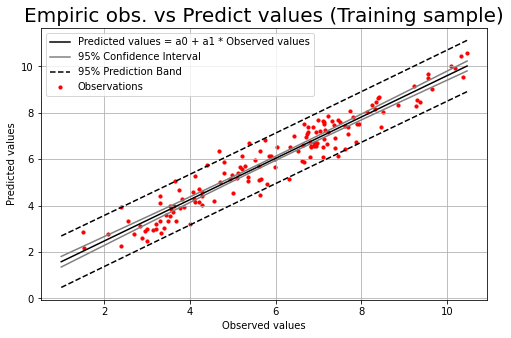

In [98]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values (Training sample)', fontsize=20, color="black")
plt.show()

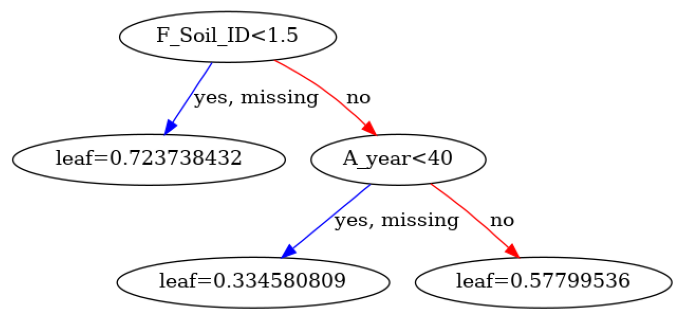

In [101]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(xgb_model,num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

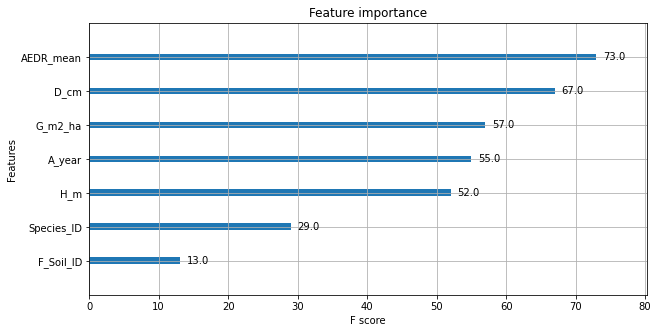

In [103]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

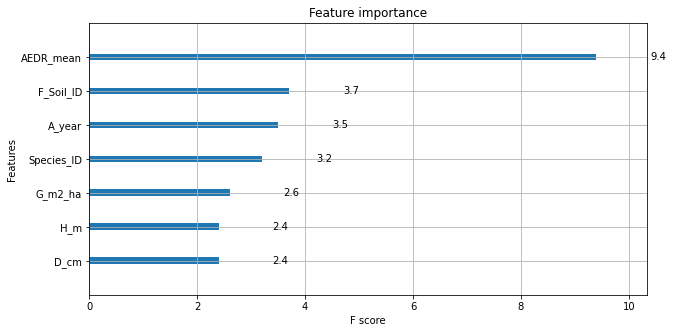

In [104]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

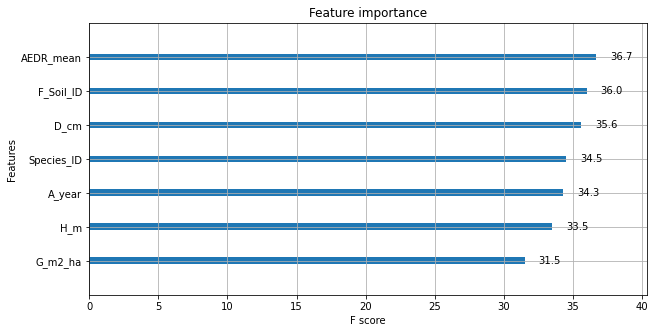

In [105]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [106]:
# Load SHAP`s library
import shap

In [107]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


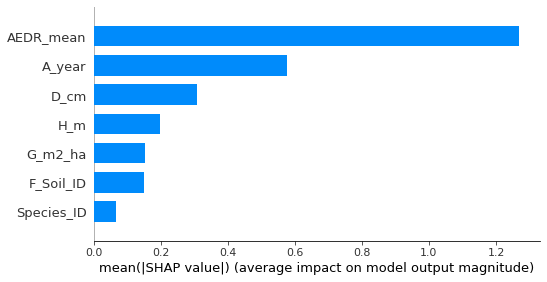

In [108]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, X_train, plot_type="bar")

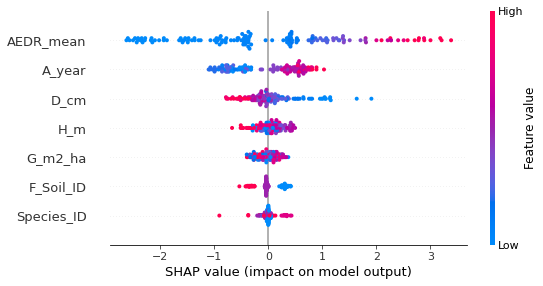

In [109]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, X_train)

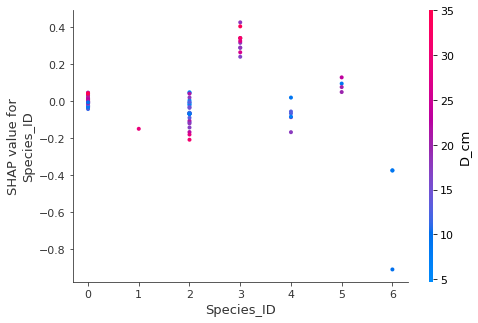

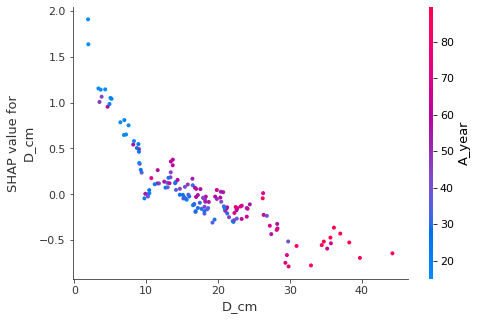

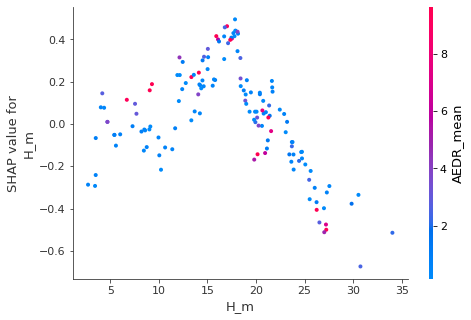

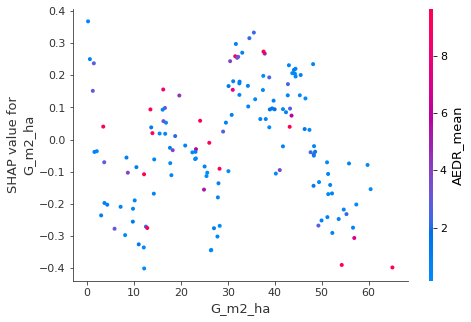

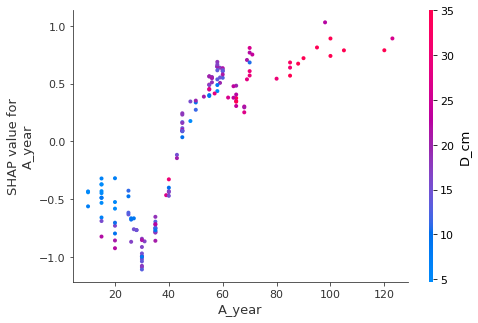

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


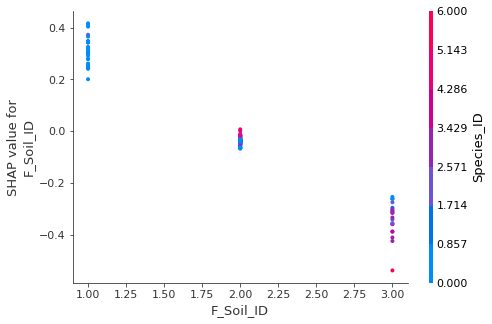

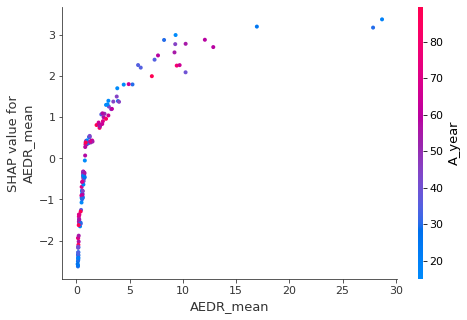

In [110]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, color=shap_values)

# Save XGBoost model

In [111]:
# Save to JSON
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in _wood/xgb_model_Cs_content_without_geodata.json")
# Save to text format
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in _wood/xgb_model_Cs_content_without_geodata.txt")